In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

In [2]:
import pandas as pd, numpy as np, os, sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from IPython.display import display, HTML

font = {'size'   : 18}
matplotlib.rc('font', **font)

def plotHorizontalBars(series, xlabel, title):
    xpos = np.arange(len(series.index), 0, -1)
    plt.barh(xpos, series, align='center', alpha=0.5, color='g')
    plt.grid(axis='x')
    plt.yticks(xpos, series.index)
    plt.xlabel(xlabel)
    plt.title(title)

def plotVerticalBars(series, ylabel, title):
    xpos = np.arange(len(series.index), 0, -1)
    plt.bar(xpos, series, align='center', alpha=0.5, color='g')
    plt.grid(axis='y')
    plt.xticks(xpos, series.index)
    plt.ylabel(ylabel)
    plt.title(title)

In [3]:
import ssl, re
ssl._create_default_https_context = ssl._create_unverified_context
pd.__version__

'0.25.3'

In [4]:
# on Github, open CSV file and click on 'Raw'. Copy URL

filename = 'time_series_19-covid-Confirmed.csv'
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'+filename
ts_df = pd.read_csv(data_url)
ts_df = ts_df[~ts_df['Province/State'].astype(str).map(lambda x: re.search('Diamond Princess', x) is not None)]
ts_df = ts_df[~ts_df['Province/State'].astype(str).map(lambda x: re.search('Grand Princess', x) is not None)]
ts_df = ts_df.sort_values(['Country/Region', 'Province/State'])
print(ts_df['Country/Region'].unique())
display(ts_df)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium'
 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana'
 'Gabon' 'Gambia, The' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland'
 'Guadeloupe' 'Guam' 'Guatemala' 'Guernsey' 'Guinea' 'Guyana' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jersey' 'Jordan'
 'Kazakhstan' 'Kenya' 'Korea, South' 'Kosovo' 'Kuwait

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
26,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,5,7,7,7,11,16,21,22,22,22.0
95,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,10,12,23,33,38,42,51,55,59,64.0
29,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,20,20,24,26,37,48,54,60,74,87.0
60,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,2,39,39,53.0
413,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,NaN,Uruguay,-32.5228,-55.7658,0,0,0,0,0,0,...,0,0,0,0,4,4,8,29,50,79.0
439,NaN,Uzbekistan,41.3775,64.5853,0,0,0,0,0,0,...,0,0,0,0,0,1,6,10,15,23.0
421,NaN,Venezuela,6.4238,-66.5897,0,0,0,0,0,0,...,0,0,0,0,2,10,17,33,36,42.0
191,NaN,Vietnam,16.0000,108.0000,0,2,2,2,2,2,...,31,38,39,47,53,56,61,66,75,85.0


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

lin_df = ts_df.drop(['Lat', 'Long', 'Province/State'], axis=1)
lin_df = lin_df.groupby('Country/Region').sum().transpose()
lin_df['date_count'] = [i for i in range(lin_df.shape[0])]
display(lin_df.tail(7))

Country/Region,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,French Guiana,Gabon,"Gambia, The",Georgia,Germany,Ghana,Greece,Greenland,Guadeloupe,Guam,Guatemala,Guernsey,Guinea,Guyana,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jersey,Jordan,Kazakhstan,Kenya,"Korea, South",Kosovo,Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Malaysia,Maldives,Malta,Martinique,Mauritania,Mauritius,Mayotte,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of the Congo,Reunion,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,The Bahamas,The Gambia,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,date_count
3/13/20,7.0,33.0,26.0,1.0,1.0,31.0,8.0,0.0,200.0,504.0,15.0,0.0,189.0,3.0,0.0,27.0,559.0,0.0,1.0,3.0,13.0,151.0,37.0,23.0,2.0,5.0,2.0,191.0,0.0,0.0,43.0,80945.0,13.0,0.0,2.0,23.0,1.0,32.0,4.0,14.0,141.0,804.0,0.0,5.0,17.0,80.0,0.0,0.0,79.0,0.0,1.0,0.0,155.0,3678.0,0.0,0.0,0.0,25.0,3675.0,0.0,190.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,19.0,134.0,82.0,69.0,11364.0,101.0,90.0,161.0,17660.0,8.0,701.0,0.0,1.0,4.0,1.0,7979.0,0.0,80.0,0.0,17.0,77.0,0.0,1.0,6.0,34.0,197.0,9.0,12.0,3.0,0.0,0.0,0.0,12.0,6.0,2.0,1.0,0.0,7.0,0.0,1.0,806.0,5.0,0.0,2.0,14.0,996.0,19.0,28.0,27.0,6.0,28.0,64.0,68.0,112.0,0.0,320.0,0.0,0.0,89.0,45.0,0.0,0.0,0.0,80.0,86.0,10.0,35.0,0.0,200.0,32.0,141.0,0.0,24.0,5232.0,6.0,1.0,0.0,814.0,1139.0,50.0,0.0,75.0,0.0,0.0,1.0,0.0,16.0,5.0,2112.0,3.0,85.0,802.0,0.0,0.0,0.0,47.0,0.0,51
3/14/20,11.0,38.0,37.0,1.0,1.0,34.0,18.0,0.0,250.0,655.0,15.0,0.0,210.0,3.0,0.0,27.0,689.0,0.0,1.0,10.0,18.0,151.0,40.0,41.0,2.0,7.0,2.0,196.0,0.0,0.0,61.0,80977.0,22.0,0.0,2.0,26.0,1.0,38.0,4.0,26.0,189.0,836.0,0.0,11.0,28.0,109.0,0.0,0.0,115.0,1.0,1.0,0.0,225.0,4487.0,0.0,1.0,0.0,30.0,4585.0,3.0,228.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,30.0,156.0,102.0,96.0,12729.0,110.0,129.0,193.0,21157.0,8.0,773.0,0.0,1.0,6.0,1.0,8086.0,0.0,104.0,0.0,26.0,93.0,0.0,4.0,8.0,51.0,238.0,10.0,18.0,9.0,1.0,0.0,0.0,26.0,12.0,2.0,1.0,0.0,17.0,2.0,1.0,962.0,6.0,0.0,2.0,14.0,1090.0,19.0,31.0,36.0,6.0,38.0,111.0,103.0,169.0,0.0,337.0,0.0,0.0,123.0,59.0,1.0,1.0,1.0,80.0,103.0,10.0,46.0,2.0,212.0,44.0,181.0,0.0,38.0,6391.0,10.0,1.0,1.0,961.0,1359.0,53.0,0.0,82.0,0.0,0.0,1.0,2.0,18.0,5.0,2660.0,3.0,85.0,1144.0,4.0,0.0,2.0,53.0,0.0,52
3/15/20,16.0,42.0,48.0,1.0,1.0,45.0,26.0,0.0,297.0,860.0,23.0,0.0,214.0,5.0,0.0,27.0,886.0,0.0,1.0,10.0,24.0,162.0,50.0,51.0,3.0,7.0,2.0,250.0,1.0,0.0,74.0,81003.0,34.0,1.0,2.0,27.0,1.0,49.0,4.0,26.0,253.0,875.0,0.0,11.0,28.0,110.0,0.0,1.0,171.0,1.0,1.0,0.0,244.0,4523.0,0.0,1.0,0.0,33.0,5795.0,6.0,331.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,1.0,3.0,32.0,171.0,113.0,117.0,13938.0,116.0,129.0,251.0,24747.0,10.0,839.0,0.0,8.0,9.0,3.0,8162.0,2.0,112.0,0.0,30.0,110.0,0.0,4.0,12.0,59.0,428.0,13.0,21.0,9.0,1.0,0.0,0.0,41.0,23.0,2.0,1.0,0.0,28.0,2.0,1.0,1138.0,8.0,0.0,2.0,14.0,1221.0,22.0,53.0,43.0,6.0,43.0,140.0,119.0,245.0,0.0,401.0,0.0,0.0,131.0,63.0,1.0,2.0,1.0,101.0,103.0,24.0,48.0,2.0,226.0,54.0,219.0,0.0,51.0,7798.0,18.0,1.0,1.0,1022.0,2200.0,59.0,0.0,114.0,0.0,0.0,

In [6]:
log_df = lin_df.copy()
log_df[log_df == 0] = 1e-5
log_df = np.log(log_df)
log_df[log_df < 0.1] = 0.0
log_df.date_count = lin_df.date_count
display(log_df.head(4))

Country/Region,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cuba,Cyprus,Czechia,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,French Guiana,Gabon,"Gambia, The",Georgia,Germany,Ghana,Greece,Greenland,Guadeloupe,Guam,Guatemala,Guernsey,Guinea,Guyana,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jersey,Jordan,Kazakhstan,Kenya,"Korea, South",Kosovo,Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Malaysia,Maldives,Malta,Martinique,Mauritania,Mauritius,Mayotte,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of the Congo,Reunion,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,The Bahamas,The Gambia,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,date_count
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.306275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.466145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,1
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.824374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612,0.0,1.609438,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.693147,0.0,2
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.248504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

Country/Region,date_count,US,Italy,"Korea, South",Germany,France,Iran
3/13/20,51,2112.0,17660.0,7979.0,3675.0,3678.0,11364.0
3/14/20,52,2660.0,21157.0,8086.0,4585.0,4487.0,12729.0
3/15/20,53,3432.0,24747.0,8162.0,5795.0,4523.0,13938.0
3/16/20,54,4565.0,27980.0,8236.0,7272.0,6668.0,14991.0
3/17/20,55,6353.0,31506.0,8320.0,9257.0,7699.0,16169.0
3/18/20,56,7715.0,35713.0,8413.0,12327.0,9105.0,17361.0
3/19/20,57,13611.0,41035.0,8565.0,15320.0,10886.0,18407.0


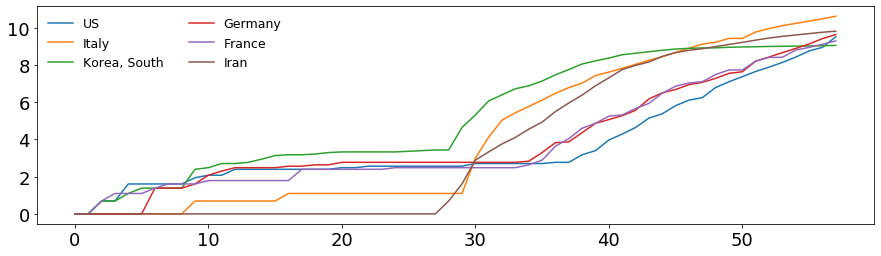

In [7]:
countries = ['Mainland China', 'US', 'Italy', 'Korea, South', 'Germany']
countries = ['US', 'Italy', 'Korea, South', 'Germany', 'France', 'Iran']
display(lin_df[['date_count'] + countries].tail(7))

fig, ax = plt.subplots(figsize=(15, 4))
for country in countries:
    ax.plot(log_df.date_count, log_df[country], label=country)
ax.legend(frameon=False, ncol=2, fontsize='x-small')

(21, 2)


Country/Region,date_count,US
2/28/20,37,16.0
2/29/20,38,24.0
3/1/20,39,30.0
3/2/20,40,53.0
3/3/20,41,73.0
3/4/20,42,104.0
3/5/20,43,172.0
3/6/20,44,217.0
3/7/20,45,336.0
3/8/20,46,452.0


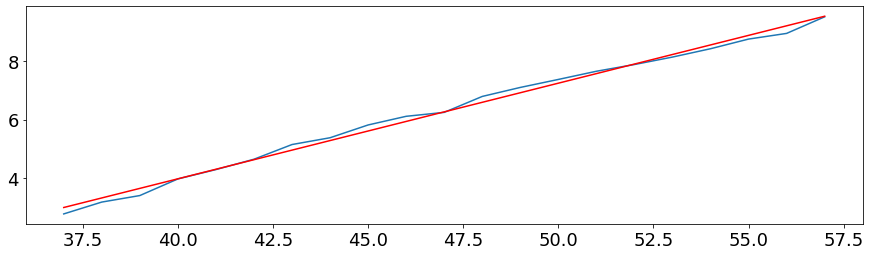

[[0.32731036]]


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

country = 'US'
df = lin_df[['date_count', country]].copy()
df = df[df.date_count >= 37]
#df = df.head(df.shape[0]-1)
print(df.shape)
display(df)

x = df.date_count.values.reshape(-1, 1)
y = df[country].values.reshape(-1, 1)
y = np.log(y)
lin_reg = LinearRegression()
lin_reg.fit(x, y)
y_fit = lin_reg.predict(x)

plt.figure(figsize=(15, 4))
plt.plot(x, y)
plt.plot(x, y_fit, color='red')
plt.show()
print(lin_reg.coef_)

(21, 2)


Country/Region,date_count,US
2/28/20,37,16.0
2/29/20,38,24.0
3/1/20,39,30.0
3/2/20,40,53.0
3/3/20,41,73.0
3/4/20,42,104.0
3/5/20,43,172.0
3/6/20,44,217.0
3/7/20,45,336.0
3/8/20,46,452.0


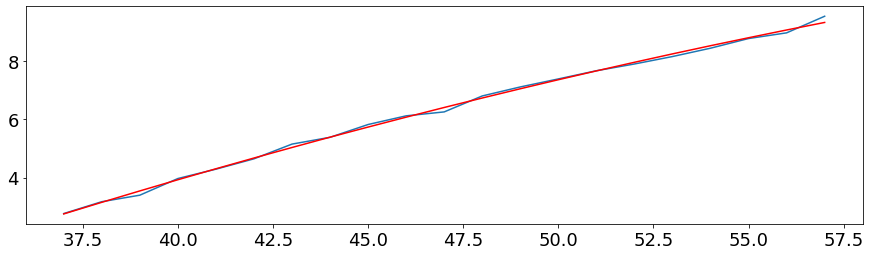

In [10]:
country = 'US'
df = lin_df[['date_count', country]].copy()
df = df[df.date_count >= 37]
#df = df.head(df.shape[0]-1)
print(df.shape)
display(df)

x = df.date_count.values.reshape(-1, 1)
x2 = x * x
y = df[country].values.reshape(-1, 1)
y = np.log(y)
qua_reg = LinearRegression()
qua_reg.fit(np.c_[x, x2], y)
y_fit = qua_reg.predict(np.c_[x, x2])

plt.figure(figsize=(15, 4))
plt.plot(x, y)
plt.plot(x, y_fit, color='red')
plt.show()

In [11]:
regressor = lin_reg

x_fut = x.copy()
x_fut -= x.min()
x_fut += x.max()
if regressor == qua_reg:
    y_fut = regressor.predict(np.c_[x_fut, x_fut*x_fut])
else:
    y_fut = regressor.predict(x_fut)
print(y_fut)
y_fut = np.exp(y_fut)
mat = np.c_[x_fut, y_fut].astype(int)
print(mat)

[[ 9.53826499]
 [ 9.86557534]
 [10.1928857 ]
 [10.52019605]
 [10.84750641]
 [11.17481676]
 [11.50212712]
 [11.82943747]
 [12.15674783]
 [12.48405819]
 [12.81136854]
 [13.1386789 ]
 [13.46598925]
 [13.79329961]
 [14.12060996]
 [14.44792032]
 [14.77523067]
 [15.10254103]
 [15.42985138]
 [15.75716174]
 [16.08447209]]
[[     57   13880]
 [     58   19255]
 [     59   26712]
 [     60   37056]
 [     61   51405]
 [     62   71311]
 [     63   98925]
 [     64  137233]
 [     65  190374]
 [     66  264093]
 [     67  366358]
 [     68  508224]
 [     69  705025]
 [     70  978033]
 [     71 1356759]
 [     72 1882140]
 [     73 2610965]
 [     74 3622014]
 [     75 5024574]
 [     76 6970250]
 [     77 9669354]]
